In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.shape

(200, 6)

In [4]:
#preprocessing
#Remove the column containing the target name since it doesn't contain numeric values.
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]



array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [5]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [6]:
Y = df["Drug"]
Y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [7]:
#Setting up decision tree
from sklearn.model_selection import train_test_split

In [8]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

In [9]:
#practice
#training
print("X_trainsetX SHAPE:  " + str(X_trainset.shape))
print("Y_trainsetX SHAPE:  " + str(Y_trainset.shape))

X_trainsetX SHAPE:  (140, 5)
Y_trainsetX SHAPE:  (140,)


In [10]:
#testing
print("X_testsetX SHAPE:  " + str(X_testset.shape))
print("Y_testsetY SHAPE:  " + str(Y_testset.shape))

X_testsetX SHAPE:  (60, 5)
Y_testsetY SHAPE:  (60,)


In [11]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=4)

In [12]:
clf_gini=clf_gini.fit(X_trainset,Y_trainset)
clf_gini

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [13]:
#prediction
predTree = clf_gini.predict(X_testset)
predTree

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

In [14]:
print (predTree [0:5])
print (Y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [15]:
df=confusion_matrix(Y_testset,predTree)
df

array([[ 7,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 20,  1],
       [ 0,  0,  0,  0, 22]])

In [16]:
df=accuracy_score(Y_testset,predTree)*100
df

98.33333333333333

In [17]:
df=classification_report(Y_testset, predTree)
df

'              precision    recall  f1-score   support\n\n       drugA       1.00      1.00      1.00         7\n       drugB       1.00      1.00      1.00         5\n       drugC       1.00      1.00      1.00         5\n       drugX       1.00      0.95      0.98        21\n       drugY       0.96      1.00      0.98        22\n\n    accuracy                           0.98        60\n   macro avg       0.99      0.99      0.99        60\nweighted avg       0.98      0.98      0.98        60\n'

In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Accuracy:",metrics.accuracy_score(Y_testset, predTree))

Accuracy: 0.9833333333333333


In [19]:
#visualization
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

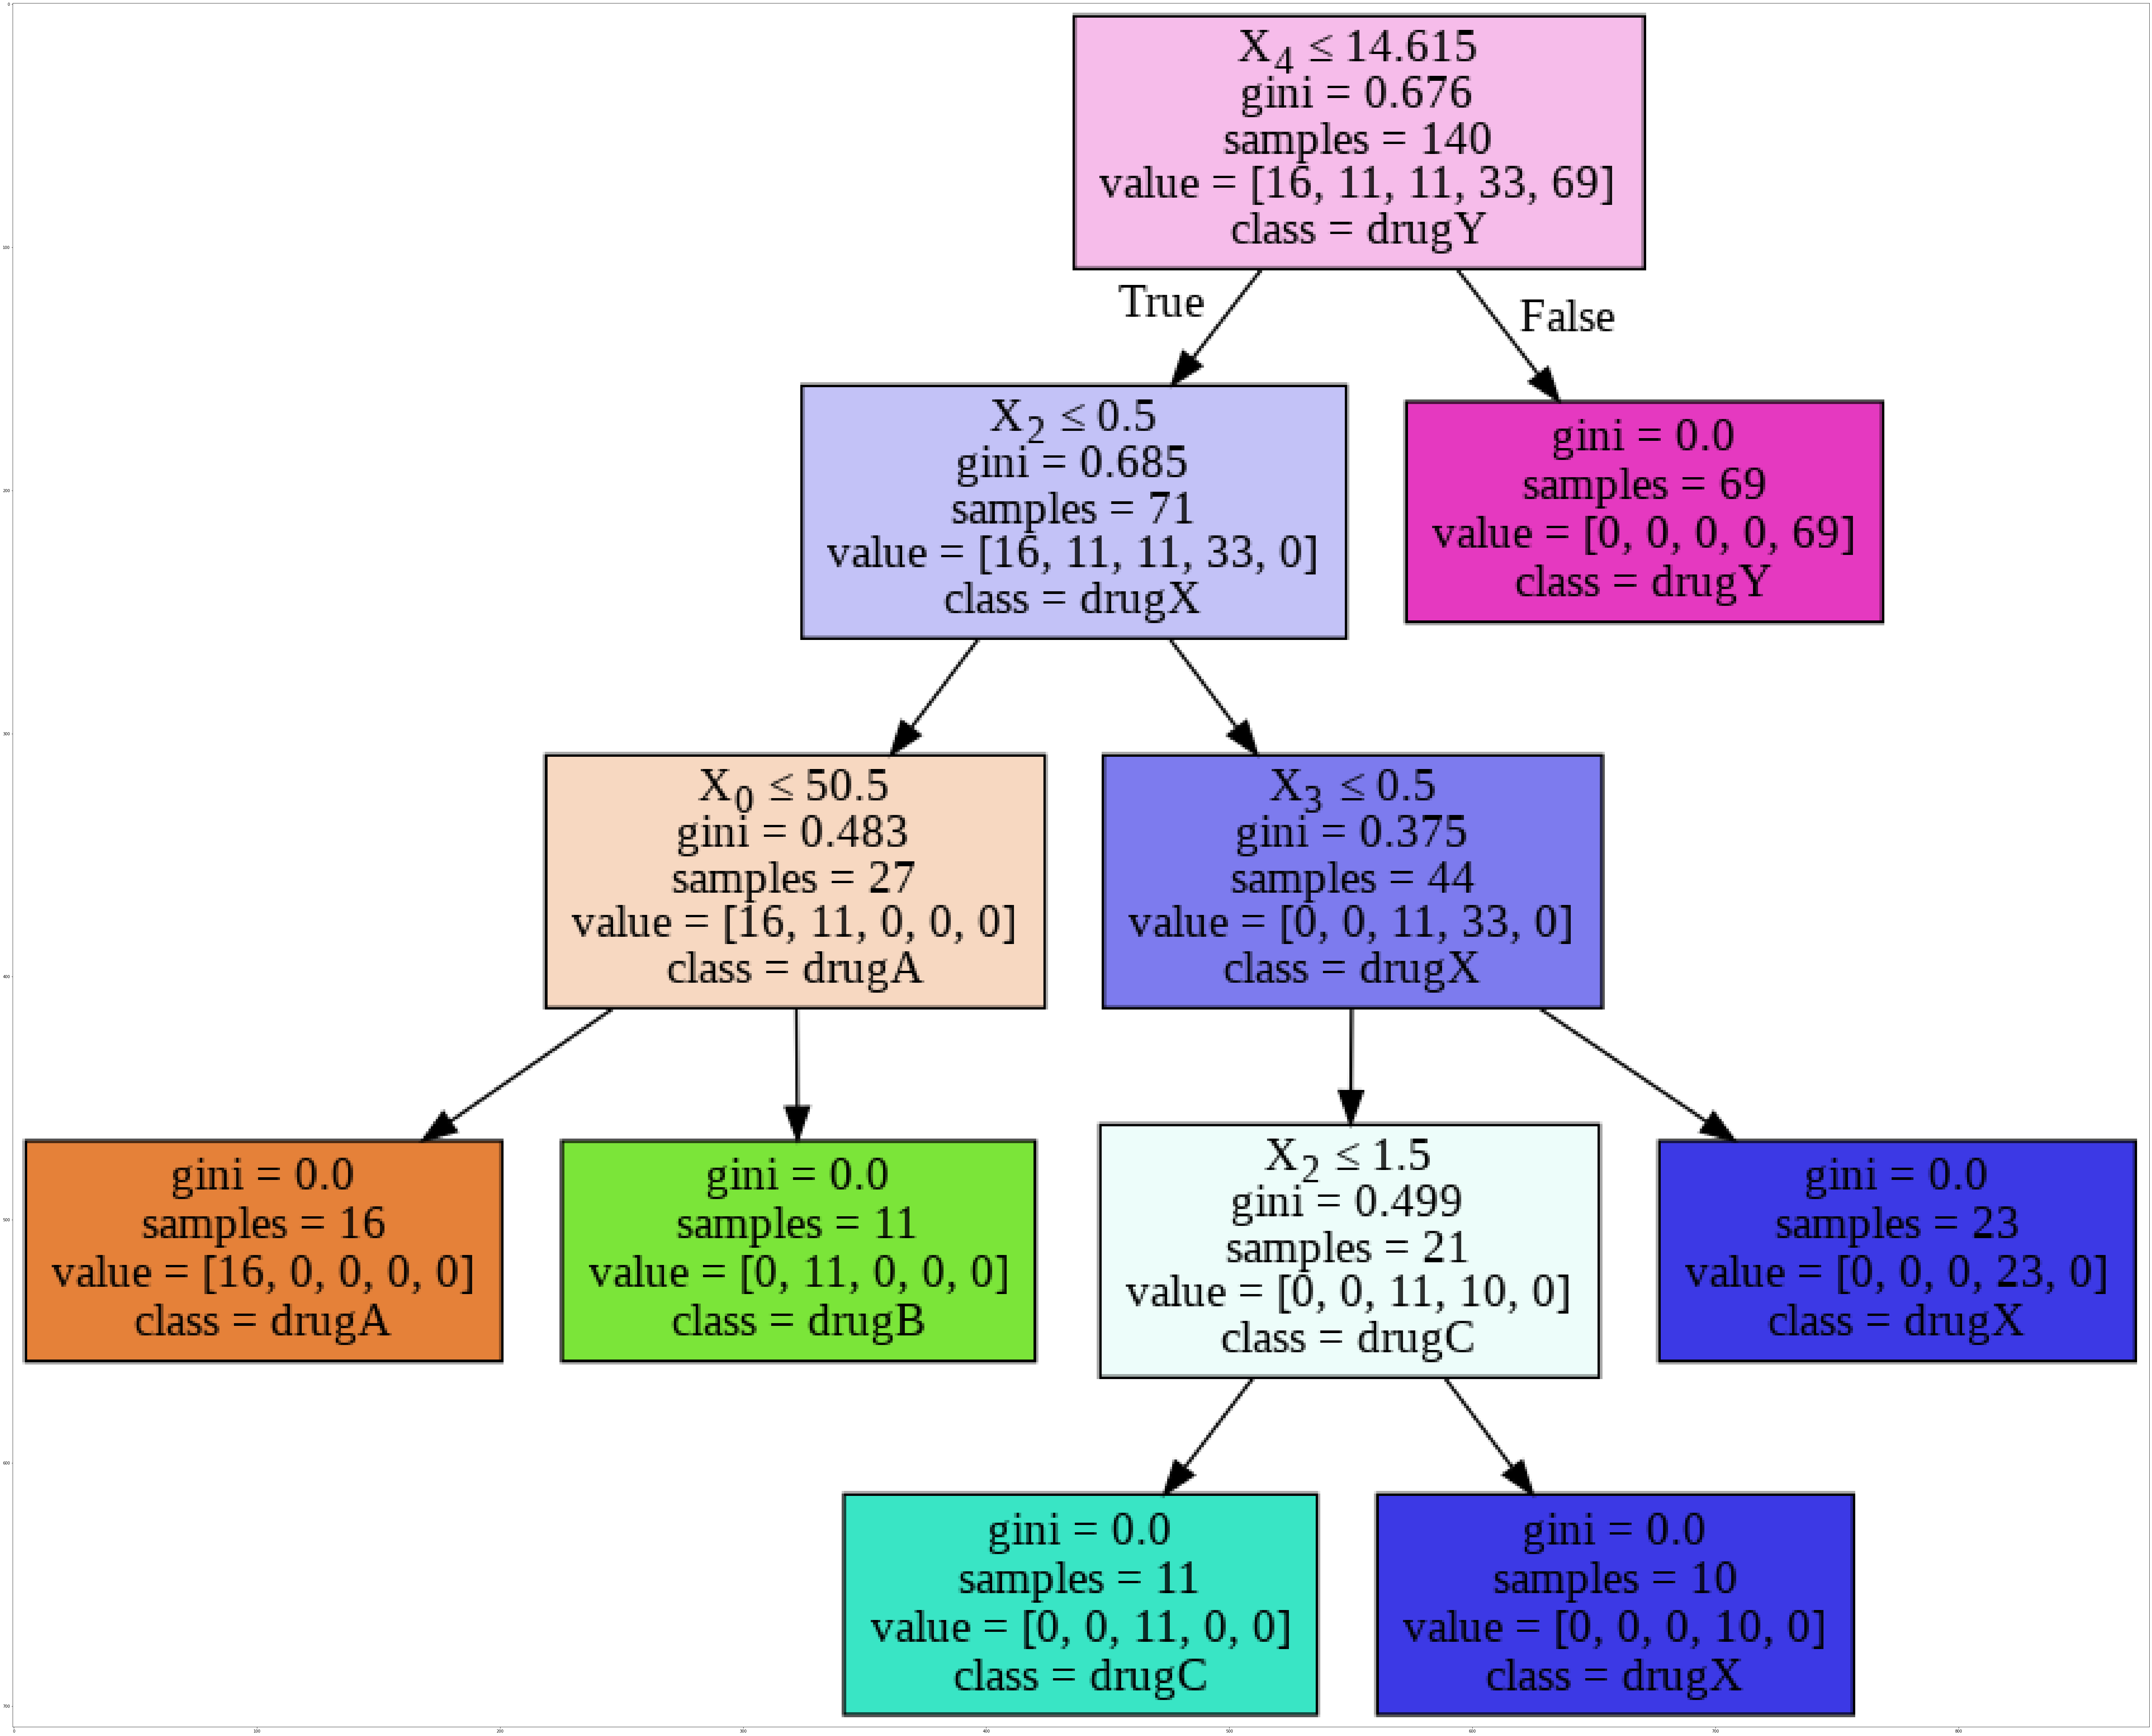

In [20]:
dot_data = StringIO()
filename = "drugtree.png"
#featureNames = df.columns[0:5]
out=tree.export_graphviz(clf_gini,out_file=dot_data, class_names= np.unique(Y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [21]:
#modeling
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100,max_depth = 4)
clf_entropy 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [22]:
clf_entropy.fit(X_trainset, Y_trainset)
clf_entropy

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [23]:
predTree1 = clf_entropy.predict(X_testset)
predTree1

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

In [24]:
print (predTree1 [0:5])
print (Y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [25]:
df1=confusion_matrix(Y_testset,predTree1)
df1

array([[ 7,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 20,  1],
       [ 0,  0,  0,  0, 22]])

In [26]:
df1=accuracy_score(Y_testset,predTree1)*100
df1

98.33333333333333

In [27]:
df1=classification_report(Y_testset, predTree1)
df1

'              precision    recall  f1-score   support\n\n       drugA       1.00      1.00      1.00         7\n       drugB       1.00      1.00      1.00         5\n       drugC       1.00      1.00      1.00         5\n       drugX       1.00      0.95      0.98        21\n       drugY       0.96      1.00      0.98        22\n\n    accuracy                           0.98        60\n   macro avg       0.99      0.99      0.99        60\nweighted avg       0.98      0.98      0.98        60\n'

In [28]:
#Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree1))

DecisionTrees's Accuracy:  0.9833333333333333


In [29]:
#visualization
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

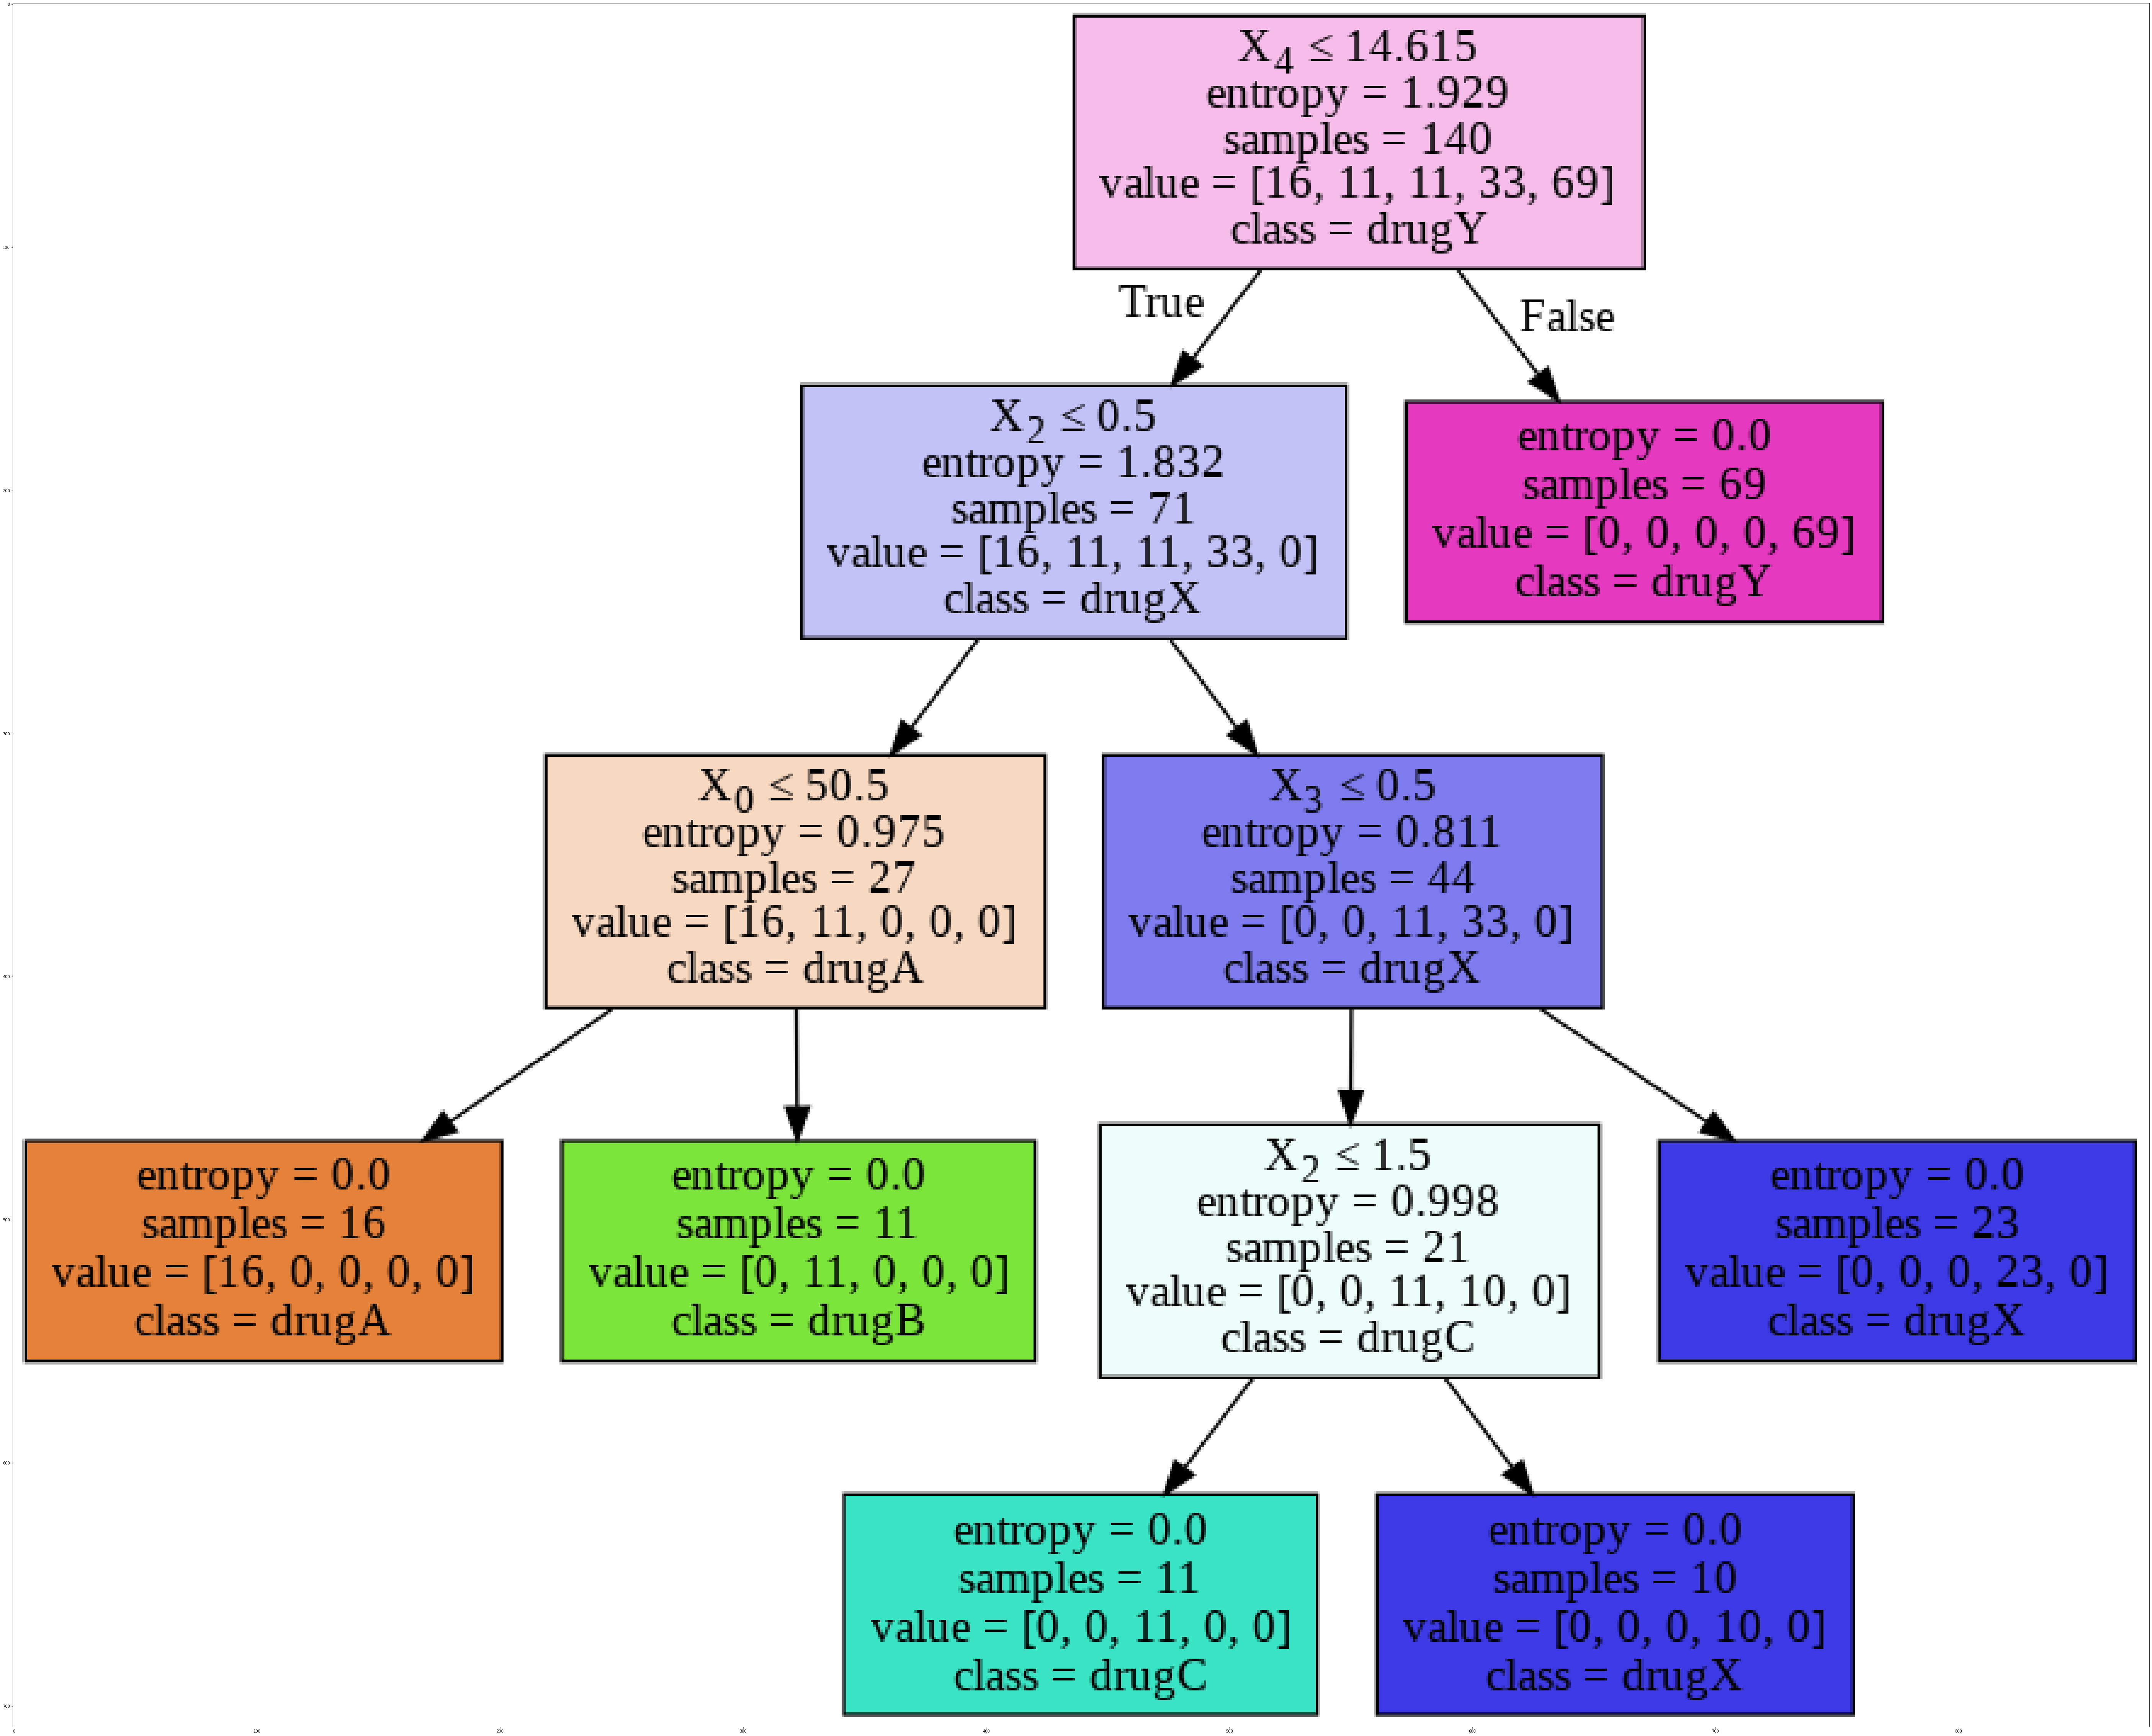

In [30]:
dot_data = StringIO()
filename = "drugtree.png"
#featureNames = df.columns[0:5]
out=tree.export_graphviz(clf_entropy,out_file=dot_data, class_names= np.unique(Y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [31]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion':['gini','entropy'],'max_depth':range(2,10)}]
clf_tree = DecisionTreeClassifier()
#scoring = ['precision_macro', 'balanced_accuracy']
clf = GridSearchCV(clf_tree,tuned_parameters,n_jobs=1)
clf.fit(X_trainset, Y_trainset)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                  

In [32]:
clf.best_score_

0.9928571428571429

In [33]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}